# Logistic Regression
---

## Derive the gradient of the negative log likelihood
$\nabla_{\theta} \log p(D_y | D_x, \hat{\theta_t})$

$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{\partial}{\partial \theta_{j}} y \log \sigma (\theta^{T}x) + \frac{\partial}{\partial \theta_{j}} (1 - y) \log [1 - \sigma (\theta^{T}x)]$

$ = [\frac{y}{\sigma (\theta^{T}x)} - \frac{1 - y}{1 - \sigma (\theta^{T}x)}] \frac{\partial}{\partial \theta_{j}} \sigma (\theta^{T}x)$

$ = [\frac{y}{\sigma (\theta^{T}x)} - \frac{1 - y}{1 - \sigma (\theta^{T}x)}] \sigma (\theta^{T}x) [1 - \sigma (\theta^{T}x)] x_{j}$ 

$ = [\frac{y - \sigma (\theta^{T}x)}{\sigma (\theta^{T}x)[1 - \sigma (\theta^{T}x)]}] \sigma (\theta^{T}x) [1 - \sigma (\theta^{T}x)] x_{j}$ 

$ = [y - \sigma (\theta^{T}x)] x_{j} $

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784); x_test = x_test.reshape(-1, 784)

In [3]:
idx = np.any((y_train == 0 , y_train == 1),axis=0)
x_train = x_train[idx]
y_train = y_train[idx]

idx = np.any((y_test == 0 , y_test == 1),axis=0)
x_test = x_test[idx]
y_test = y_test[idx]

# Implementation

In [4]:
def batch(x, y, batch_size):
    for i in range(0, len(x)-batch_size, batch_size):
        yield x[i:i+batch_size]/255., y[i:i+batch_size][:,np.newaxis]
        
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def acc(true, pred):
    return np.sum((pred > .5) == true)/ float(len(true))

In [5]:
batch_size = 100; lr = 0.001; epochs = 25
bias = 0; theta = np.random.uniform(-1e-2, 1e-2, size=(784,1))
storage = {'ll':[], 'train acc':[], 'val acc':[]}
for epoch in range(epochs):
    ll = 0; train_acc = []
    for x,y in batch(x_train, y_train, batch_size):
        # predict
        z = np.dot(x, theta) + bias
        y_hat = sigmoid(z)

        train_acc.append(acc(y, y_hat))
        # calc nll for batch
        ll += np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat))) / float(batch_size)

        # parameter updates
        theta -= - lr * np.dot(x.T, y - y_hat ) / float(batch_size)
        bias -= -lr * np.sum(y - y_hat) / float(batch_size)

    val_acc = []
    for x,y in batch(x_test, y_test, batch_size):
        y_hat = sigmoid(np.dot(x, theta) + bias)
        val_acc.append(acc(y, y_hat))
        
    storage['ll'].append(ll)
    storage['val acc'].append(np.mean(val_acc))
    storage['train acc'].append(np.mean(train_acc))

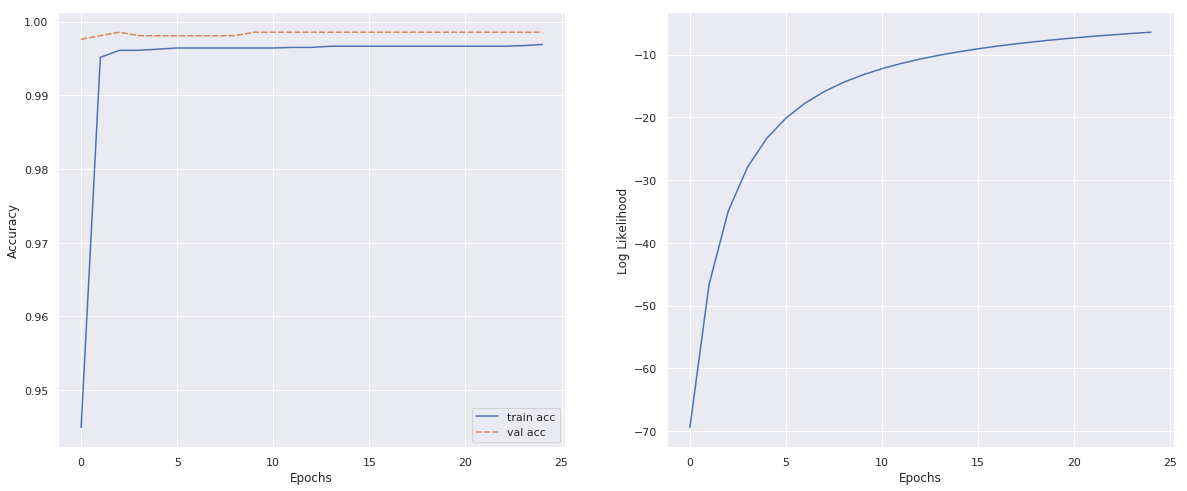

In [6]:
df = pd.DataFrame(storage)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.lineplot(data=df[['train acc','val acc']])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
sns.lineplot(data=df['ll'])
plt.ylabel('Log Likelihood')
plt.xlabel('Epochs')

plt.show()